In [88]:
import pandas as pd
import gc
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier  # Importar el modelo XGBoost
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np  # Para lidiar con NaNs.
import time
import sklearn
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
import logging
import gensim
import numpy as np
import random
import os
import pickle
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import nltk
import matplotlib.pyplot as plt



# Score del modelo inicial 0.9464088135807542


In [15]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

# Paso la fecha a variable dia, mes, año 
df["date"] = pd.to_datetime(df["date"])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.drop(columns=["date"])

df.to_csv('competition_data_1.csv', index=False) 

del df 

In [16]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

# Separo los full_name en categorias y obtengo las dummies 
df['Categoria'] = df['full_name'].str.split(' -> ').str.get(0)
dummies = pd.get_dummies(df['Categoria'])
df = pd.concat([df, dummies], axis=1)

df.to_csv('competition_data_2.csv', index=False) 

del df 

In [17]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

# Para las categorias binarias, reemplazo los True y False por 1 y 0
categorical_columns_to_encode = ["accepts_mercadopago", "boosted", "free_shipping", "fulfillment", "is_pdp"]
for col in categorical_columns_to_encode:
    df[col] = df[col].replace({True: 1, False: 0})

df.to_csv('competition_data_3.csv', index=False) 

del df 


In [18]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

# Me fijo si ofrecen algun tipo de garantía y lo reemplazo por 1 y 0
for fila in df['warranty'].index:
    if df['warranty'][fila] == 'Sin garant√≠a':
        df['warranty'][fila] = 0
    elif df['warranty'][fila] == None: 
        pass
    else:
        df['warranty'][fila] = 1

df.to_csv('competition_data_4.csv', index=False) 

del df 

/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/2613284890.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['warranty'][fila] = 1


In [19]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

#Creo una variable que tiene el porcentaje de descuento que se le hace 
df['discount'] = (df['original_price'] - df['price']) / df['original_price']

df.to_csv('competition_data_5.csv', index=False) 

del df 


In [20]:
# Archivo CSV de entrada 
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(archivo_entrada)

#Cambio el listing_type_id por 1 y 2

for fila in df['listing_type_id'].index:
    if df['listing_type_id'][fila] == 'gold_special':
        df['listing_type_id'][fila] = 1
    elif df['listing_type_id'][fila] == 'gold_pro':
        df['listing_type_id'][fila] = 2

df.to_csv('competition_data_6.csv', index=False) 

del df 

/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/1770094589.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listing_type_id'][fila] = 1
/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/1770094589.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listing_type_id'][fila] = 2


In [30]:
# Lista de nombres de archivos de datos
data_files = ["/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_1.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_2.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_3.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_4.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_5.csv", "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_6.csv"]

for data_file in data_files:
    # Cargar el archivo de datos
    comp_data = pd.read_csv(data_file)
    comp_data["date"] = pd.to_datetime(comp_data["date"])

    # Divide la columna de fecha en día, mes y año
    comp_data['day'] = comp_data['date'].dt.day
    comp_data['month'] = comp_data['date'].dt.month
    comp_data['year'] = comp_data['date'].dt.year

    # Split into training and evaluation samples
    train_data = comp_data[comp_data["ROW_ID"].isna()]
    eval_data = comp_data[comp_data["ROW_ID"].notna()]
    del comp_data
    gc.collect()

    # Dividir los datos en conjunto de entrenamiento y prueba (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(
        train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include='number'),
        train_data["conversion"],
        test_size=0.3,  # Proporción para el conjunto de prueba
        random_state=42  # Semilla aleatoria para reproducibilidad
    )
    del train_data
    gc.collect()

    # Cambiar el modelo a XGBoost
    cls = make_pipeline(SimpleImputer(), XGBClassifier(max_depth=10, random_state=2345))
    cls.fit(X_train, y_train)

    # Predict on the evaluation set
    eval_data = eval_data.drop(columns=["conversion"])
    eval_data = eval_data.select_dtypes(include='number')
    y_preds = cls.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, cls.classes_ == 1].squeeze()

    print(f"Archivo: {data_file}")
    print(f"Score: {cls.score(X_test, y_test)}")

Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv
Score: 0.9036308985966918
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_1.csv
Score: 0.9036308985966918
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_2.csv
Score: 0.9027826439727821
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_3.csv
Score: 0.9040365855907356
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_4.csv
Score: 0.9036308985966918
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_5.csv
Score: 0.9025982407936712
Archivo: /Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_6.csv
Score: 0.9026535617474045



Estos fueron los scores obtenidos en el entrenamiento de un modelo donde se incluía cada uno de los cambios sobre el data frame individualmente. De los resultados obtenidos, podemos ver que todos mejoraron el score del modelo, salvo el 2 en el que se crean variables dummies para las categorias de los productos. 
Asi, voy a hacer un nuevo data frame que incluya todos los cambios realizados salvo el 2. 

In [22]:
archivo_entrada = "/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data.csv"

# Leer el archivo CSV en un DataFrame
comp_data = pd.read_csv(archivo_entrada)

# Paso la fecha a variable dia, mes, año 
comp_data["date"] = pd.to_datetime(comp_data["date"])
comp_data['day'] = comp_data['date'].dt.day
comp_data['month'] = comp_data['date'].dt.month
comp_data['year'] = comp_data['date'].dt.year
comp_data.drop(columns=["date"])

# Para las categorias binarias, reemplazo los True y False por 1 y 0
categorical_columns_to_encode = ["accepts_mercadopago", "boosted", "free_shipping", "fulfillment", "is_pdp"]
for col in categorical_columns_to_encode:
    comp_data[col] = comp_data[col].replace({True: 1, False: 0})

# Me fijo si ofrecen algun tipo de garantía y lo reemplazo por 1 y 0
for fila in comp_data['warranty'].index:
    if comp_data['warranty'][fila] == 'Sin garant√≠a':
        comp_data['warranty'][fila] = 0
    elif comp_data['warranty'][fila] == None: 
        pass
    else:
        comp_data['warranty'][fila] = 1

#Creo una variable que tiene el porcentaje de descuento que se le hace 
comp_data['discount'] = (comp_data['original_price'] - comp_data['price']) / comp_data['original_price']

#Cambio el listing_type_id por 1 y 2
for fila in comp_data['listing_type_id'].index:
    if comp_data['listing_type_id'][fila] == 'gold_special':
        comp_data['listing_type_id'][fila] = 1
    elif comp_data['listing_type_id'][fila] == 'gold_pro':
        comp_data['listing_type_id'][fila] = 2



comp_data.to_csv('competition_data_7.csv', index=False) 

del comp_data 

/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/3693651291.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['warranty'][fila] = 1
/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/3693651291.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listing_type_id'][fila] = 1
/var/folders/5d/4g206gss6cg3fktfbycqnb540000gn/T/ipykernel_3774/3693651291.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
#Entreno un modelo con todo el dataset nuevo 
# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_7.csv")
comp_data["date"] = pd.to_datetime(comp_data["date"])

# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include='number'),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()


0

In [24]:
# Cambiar el modelo a XGBoost
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc')
clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)

# cls = make_pipeline(SimpleImputer(), XGBClassifier(max_depth=10, random_state=2345))  # Usar XGBClassifier en lugar de DecisionTreeClassifier
# cls.fit(X_train, y_train)

# Predict on the evaluation set
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include='number')
y_preds =clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()

# Make the submission file
# submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
# submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
# submission_df.to_csv("xgboost_model_8.csv", sep=",", index=False)


In [25]:
print(clf_xgb.score(X_test, y_test))

0.9073961387398352


In [31]:
from scipy.stats import uniform

params = {'max_depth': list(range(1, 40)),
          'learning_rate': uniform(scale = 0.2),
          'gamma': uniform(scale = 2),
          'reg_lambda': uniform(scale = 5),        # Parámetro de regularización.
          'subsample': uniform(0.5, 0.5),          # Entre 0.5 y 1.
          'min_child_weight': uniform(scale = 5),
          'colsample_bytree': uniform(0.75, 0.25), # Entre 0.75 y 1.
          'n_estimators': list(range(1, 1000))
         }

In [61]:
#Entreno un modelo con todo el dataset nuevo 
# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_7.csv")
comp_data["date"] = pd.to_datetime(comp_data["date"])

# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include='number'),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()


0

## NO CORRER, Tarda 10 hs

In [62]:
random_state = 2345
start = time.time()
best_score = 0
best_estimator = None
iterations = 100
for g in ParameterSampler(params, n_iter = iterations, random_state = random_state):
    clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = random_state, eval_metric = 'auc', **g)
    clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)

    y_pred = clf_xgb.predict_proba(X_test)[:, 1] # Obtenemos la probabilidad de una de las clases (cualquiera).
    auc_roc = sklearn.metrics.roc_auc_score(y_test, y_pred)
    # Guardamos si es mejor.
    if auc_roc > best_score:
        print(f'Mejor valor de ROC-AUC encontrado: {auc_roc}')
        best_score = auc_roc
        best_grid = g
        best_estimator = clf_xgb

end = time.time()
print('ROC-AUC: %0.5f' % best_score)
print('Grilla:', best_grid)
print(f'Tiempo transcurrido: {str(end - start)} segundos')
print(f'Tiempo de entrenamiento por iteración: {str(round((end - start) / iterations, 2))} segundos')

Mejor valor de ROC-AUC encontrado: 0.8883394492644392
Mejor valor de ROC-AUC encontrado: 0.8941624788503874
Mejor valor de ROC-AUC encontrado: 0.8962621064207101
Mejor valor de ROC-AUC encontrado: 0.8969607717231346
Mejor valor de ROC-AUC encontrado: 0.897251024058803
ROC-AUC: 0.89725
Grilla: {'colsample_bytree': 0.7579620578446584, 'gamma': 0.7297041792253138, 'learning_rate': 0.021892166283765713, 'max_depth': 13, 'min_child_weight': 1.1724744683543746, 'n_estimators': 784, 'reg_lambda': 1.8656819555055764, 'subsample': 0.8630230443880356}
Tiempo transcurrido: 30753.64494395256 segundos
Tiempo de entrenamiento por iteración: 307.54 segundos


In [9]:
#Entreno un modelo con todo el dataset nuevo Modelo 9 
# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_7.csv")


# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float']),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()

0

In [6]:


params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [10]:

eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds =clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()

# Make the submission file
# submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
# submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
# submission_df.to_csv("xgboost_model_9.csv", sep=",", index=False)

In [11]:
print(clf_xgb.score(X_test, y_test))

0.9090003872323947


In [26]:
#Sigo viendo cambios para hacer en el df 

df = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_7.csv")
dummies = pd.get_dummies(df['platform'])
df = pd.concat([df, dummies], axis=1)

df.to_csv('competition_data_8.csv', index=False)

In [31]:
#Entreno un nuevo modelo con este nuevo df

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_8.csv")


# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float']),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()


0

In [28]:
# Modelo 10 

params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [32]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds =clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()

# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_10.csv", sep=",", index=False)

print(clf_xgb.score(X_test, y_test))

0.9103280411572716


In [49]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/franciscofrustoalvarado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/franciscofrustoalvarado/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
#Funciones para Word2vec

STOP_WORDS_SP = set(stopwords.words('spanish'))

def iterate_LN_corpus(path):
    """
    Genera un iterador para recorrer los archivos de texto en un directorio.

    Args:
        path (str): Ruta al directorio que contiene los archivos.

    Yields:
        str: Texto contenido en cada archivo.
    """
    articles = os.listdir(path)
    random.shuffle(articles)
    for art in articles:
        with open(path + art, encoding="utf-8") as f:
            raw_text = f.read()
        yield(raw_text)

def tokenizer(raw_text):
    """
    Tokeniza y preprocesa un texto.

    Args:
        raw_text (str): Texto sin procesar.

    Returns:
        list: Lista de oraciones, donde cada oración es una lista de palabras.
    """
    sentences = sent_tokenize(raw_text)
    sentences = [word_tokenize(e) for e in sentences]
    sentences = [[e2 for e2 in e1 if re.compile("[A-Za-z]").search(e2[0])] for e1 in sentences]
    sentences = [[e2.lower() for e2 in e1] for e1 in sentences]
    return(sentences)

def gen_sentences(path):
    """
    Genera una lista de oraciones a partir de archivos de texto en un directorio.

    Args:
        path (str): Ruta al directorio que contiene los archivos de texto.

    Returns:
        list: Lista de oraciones.
    """
    sentences = []
    n_arts = len(os.listdir(path))
    for i, art in tqdm.tqdm(enumerate(iterate_LN_corpus(path)), total=n_arts):
        sentences.extend(tokenizer(art))
    return(sentences)

def average_vectors(title_tokens, model, stopwords=None):
    """
    Calcula el vector promedio de un conjunto de tokens utilizando un modelo Word2Vec.

    Args:
        title_tokens (list): Lista de tokens.
        model (gensim.models.Word2Vec): Modelo Word2Vec.
        stopwords (set, optional): Conjunto de palabras stopwords. Defaults to None.

    Returns:
        numpy.ndarray: Vector promedio.
    """
    title_tokens = [e2 for e1 in title_tokens for e2 in e1]
    title_tokens = [e for e in title_tokens if e in model.wv]
    if stopwords is not None:
        title_tokens = [e for e in title_tokens if e not in stopwords]
    if len(title_tokens) == 0:
        output = np.zeros(model.wv.vector_size)
    else:
        output = np.array([model.wv.get_vector(e) for e in title_tokens]).mean(0)
    return output

def dummy_tokenizer(text_tokens):
    """
    Tokenizador dummy que simplemente devuelve los tokens de texto sin procesar.

    Args:
        text_tokens (list): Lista de tokens.

    Returns:
        list: Misma lista de tokens de entrada.
    """
    return text_tokens

In [7]:
#Word2vec
# Carga de datos desde un archivo CSV

comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_8.csv")
comp_data["title_tokens"] = comp_data["title"].map(tokenizer)

# Creación del modelo Word2Vec
w2v_tp = gensim.models.Word2Vec(vector_size=50,
                                window=5,
                                min_count=5,
                                negative=15,
                                sample=0.01,
                                workers=8,
                                sg=1)

# Creación del vocabulario a partir del corpus
w2v_tp.build_vocab([e2 for e1 in comp_data["title_tokens"].values for e2 in e1],
                   progress_per=10000)

# Entrenamiento del modelo Word2Vec
w2v_tp.train([e2 for e1 in comp_data["title_tokens"].values for e2 in e1],
             total_examples=w2v_tp.corpus_count,
             epochs=30, report_delay=1)

# Obtención de embeddings de títulos utilizando el modelo Word2Vec
title_embs = comp_data["title_tokens"].map(lambda x: average_vectors(x, w2v_tp, STOP_WORDS_SP))
title_embs = np.array(title_embs.to_list())


In [8]:
#Armo el csv con toda la info anterior y la codificacion de los titulos 
titles = pd.DataFrame(title_embs)
csv_9 = pd.concat([comp_data, titles], axis=1)


csv_9.to_csv('competition_data_9.csv', index=False)

In [14]:
#Hago un modelo con esta nueva info 

#Entreno un nuevo modelo con este nuevo df

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_9.csv")


# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float']),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()

0

In [11]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## Tarda 1hs

In [17]:
# Modelo 11

params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [15]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds =clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()

# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_11.csv", sep=",", index=False)

print(clf_xgb.score(X_test, y_test))

0.9096642141948332


In [65]:
#El modelo 11 fue el que tuvo el mejor score, ahora lo entreno de vuelta con todos los datos

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_9.csv")

eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]

In [6]:
# Modelo 13

params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train, y_train, verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [22]:
print(clf_xgb.classes_)

[0. 1.]


In [31]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_13.csv", sep=",", index=False)



In [4]:
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_9.csv")

comp_data["price2"] = comp_data['price']*comp_data['price']

comp_data.to_csv('competition_data_10.csv', index=False)


In [27]:
#Hago un modelo con esta nueva info 

#Entreno un nuevo modelo con este nuevo df

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_10.csv")


# Split into training and evaluation samples
train_data = comp_data[comp_data["ROW_ID"].isna()]
eval_data = comp_data[comp_data["ROW_ID"].notna()]
del comp_data
gc.collect()

# Dividir los datos en conjunto de entrenamiento y prueba (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    train_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float']),
    train_data["conversion"],
    test_size=0.1,  # Proporción para el conjunto de prueba
    random_state=42  # Semilla aleatoria para reproducibilidad
)
del train_data
gc.collect()

0

In [28]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [29]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds =clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()


print(clf_xgb2.score(X_test, y_test))

0.908502517010566


In [8]:
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_12.csv", sep=",", index=False)

In [34]:
#agrego la columna de que pdp sea Nan

comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_9.csv")

comp_data['pdp'+'_is_nan'] = comp_data['is_pdp'].isna().astype(int)

comp_data.to_csv('competition_data_11.csv', index=False)

In [43]:
#Hago un modelo con esta nueva info 
#Modelo 14

#Entreno un nuevo modelo con este nuevo df

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_11.csv")

eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]

In [44]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [45]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds =clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()


# print(clf_xgb2.score(X_test, y_test))

In [46]:
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_14.csv", sep=",", index=False)

In [71]:
df = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_11.csv")

categorical_columns_to_encode = ["accepts_mercadopago", "boosted", "free_shipping", "fulfillment"]
for col in categorical_columns_to_encode:
    # Crear columnas para "True", "False" y "NA"
    df[col + '_true'] = (df[col] == True).astype(int)
    df[col + '_false'] = (df[col] == False).astype(int)
    df[col + '_NA'] = df[col].isna().astype(int)



df.to_csv('competition_data_12.csv', index=False)

In [74]:
#Hago un modelo con esta nueva info 
#Modelo 15

#Entreno un nuevo modelo con este nuevo df

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_12.csv")


eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]


In [75]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [76]:
print(clf_xgb2.classes_)

[0. 1.]


In [77]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_15.csv", sep=",", index=False)


In [79]:
#Modelo 16 -> vuelvo a usar el modelo 13 pero estandarizando algunas variables 

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_9.csv")

eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]

# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)


In [80]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb.fit(X_train_scaled, y_train, verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [81]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_16.csv", sep=",", index=False)


In [82]:
#En base al modelo 15 lo entreno de vuelta eliminando las columnas repetidas

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_12.csv")

comp_data.drop(columns=['accepts_mercadopago', 'boosted', 'free_shipping', 'fulfillment'], inplace=True)


eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]

In [83]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [84]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_17.csv", sep=",", index=False)


In [85]:
#hago un nuevo modelo contando la cantidad de tags que tiene cada producto

#En base al modelo 15 lo entreno de vuelta eliminando las columnas repetidas

# Load the competition data
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_12.csv")

comp_data['tags_count'] = comp_data['tags'].str.count(',')+1


eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]



0         7
1         7
2         6
3         7
4         8
         ..
180756    5
180757    6
180758    6
180759    6
180760    6
Name: tags_count, Length: 180761, dtype: int64


In [86]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [87]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_18.csv", sep=",", index=False)

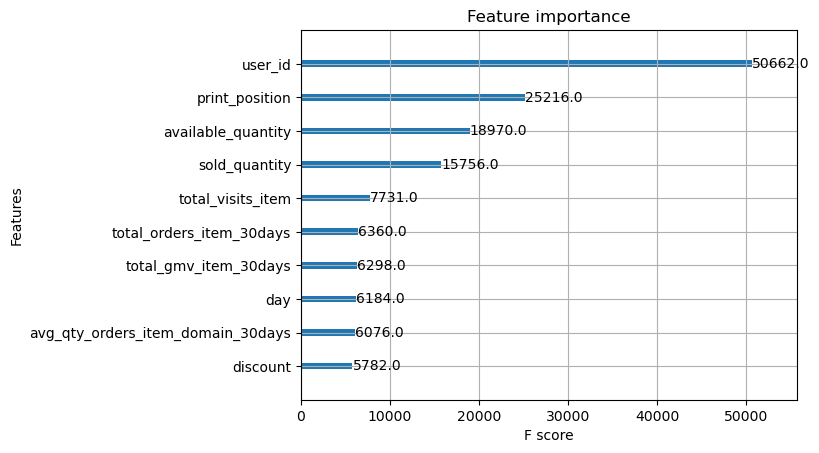

In [94]:
xgb.plot_importance(clf_xgb2, max_num_features=10)
plt.show()

In [95]:
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_12.csv")

comp_data['tags_count'] = comp_data['tags'].str.count(',')+1
comp_data['available_sold'] = comp_data['available_quantity']*comp_data['sold_quantity']

eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]

In [96]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [97]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_19.csv", sep=",", index=False)

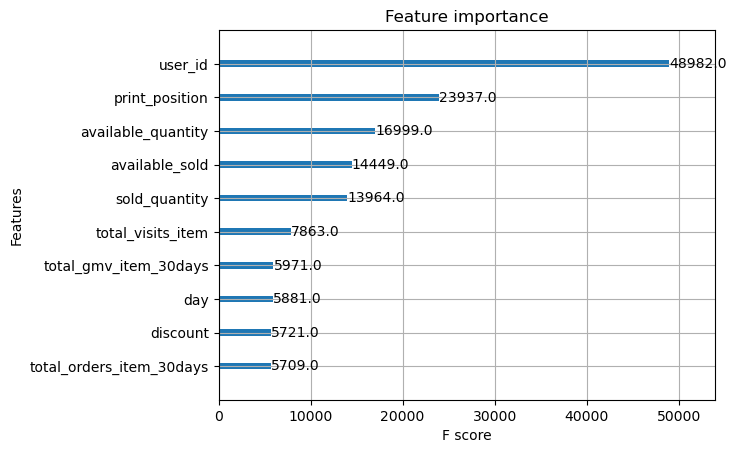

In [98]:
xgb.plot_importance(clf_xgb2, max_num_features=10)
plt.show()

In [99]:
comp_data = pd.read_csv("/Users/franciscofrustoalvarado/Desktop/TD_VI/TP2_TDVI/competition_data_12.csv")

comp_data['tags_count'] = comp_data['tags'].str.count(',')+1
comp_data['available_sold'] = comp_data['available_quantity']*comp_data['sold_quantity']
comp_data['promedio_vtas'] = comp_data['sold_quantity']/comp_data['total_visits_item']

eval_data = comp_data[comp_data["ROW_ID"].notna()]
comp_data = comp_data[comp_data["ROW_ID"].isna()]


# Asignar todos los datos a X_train e y_train
X_train = comp_data.drop(columns=["conversion", "ROW_ID"]).select_dtypes(include=['number','float'])
y_train = comp_data["conversion"]


In [100]:
params = {'max_depth': 13,
          'learning_rate': 0.021892166283765713,
          'gamma': 0.7297041792253138,
          'reg_lambda': 1.8656819555055764,        # Parámetro de regularización.
          'subsample': 0.8630230443880356,          # Entre 0.5 y 1.
          'min_child_weight': 1.1724744683543746,
          'colsample_bytree': 0.7579620578446584, # Entre 0.75 y 1.
          'n_estimators': 784
         }


clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 2345, eval_metric = 'auc', **params)
clf_xgb2.fit(X_train, y_train,verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7579620578446584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.7297041792253138, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.021892166283765713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1.1724744683543746, missing=nan,
              monotone_constraints=None, n_estimators=784, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [101]:
eval_data = eval_data.drop(columns=["conversion"])
eval_data = eval_data.select_dtypes(include=['number','float'])
y_preds = clf_xgb2.predict_proba(eval_data.drop(columns=["ROW_ID"]))[:, clf_xgb2.classes_ == 1].squeeze()
# Make the submission file
submission_df = pd.DataFrame({"ROW_ID": eval_data["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("xgboost_model_20.csv", sep=",", index=False)

In [110]:

print(comp_data.select_dtypes(include=['number','float']).columns.tolist())
print(len(comp_data.select_dtypes(include=['number','float']).columns.tolist()))

['accepts_mercadopago', 'available_quantity', 'avg_gmv_item_domain_30days', 'avg_gmv_item_sel', 'avg_gmv_seller_bday', 'avg_qty_orders_item_domain_30days', 'avg_qty_orders_item_sel_30days', 'avg_si_item_sel_30day', 'benefit', 'boosted', 'conversion', 'free_shipping', 'fulfillment', 'health', 'is_pdp', 'product_id', 'listing_type_id', 'offset', 'original_price', 'price', 'print_position', 'qty_items_dom', 'qty_items_sel', 'sold_quantity', 'total_asp_item_domain_30days', 'total_asp_item_sel_30days', 'total_gmv_domain_bday', 'total_gmv_item_30days', 'total_items_domain', 'total_items_seller', 'total_orders_domain_30days', 'total_orders_item_30days', 'total_orders_sel_30days', 'total_si_domain_30days', 'total_si_item_30days', 'total_si_sel_30days', 'total_visits_domain', 'total_visits_item', 'total_visits_seller', 'user_id', 'warranty', 'ROW_ID', 'day', 'month', 'year', 'discount', '/mobile/android', '/mobile/ios', '/web/desktop', '/web/mobile', '0', '1', '2', '3', '4', '5', '6', '7', '8',